In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


In [4]:
# Load the dataset
data=pd.read_csv('EasyVisa.csv')
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Data Preprocessing steps
* 1.Duplicate values
* 2.Null values
* 3.Shape of the data

In [6]:
def data_preprocessing(df):
    # Check for missing values
    missing_values = df.isnull().sum()
    duplicate_values =df.duplicated().sum()
    information = df.info()
    print(f'The missing values in the dataset are:\n{missing_values}')
    print(f'The duplicate values in the dataset are:\n{duplicate_values}')
    print(f'Information about the dataset:\n{information}')
    print(f'dataset:\n{df.shape[0]} rows and {df.shape[1]} columns')
data_preprocessing(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB
The missing values in the dataset are:
case_id                  0
continent                0
educatio

## Explore Data Analysis process (EDA)

In [8]:
data.head(1)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied


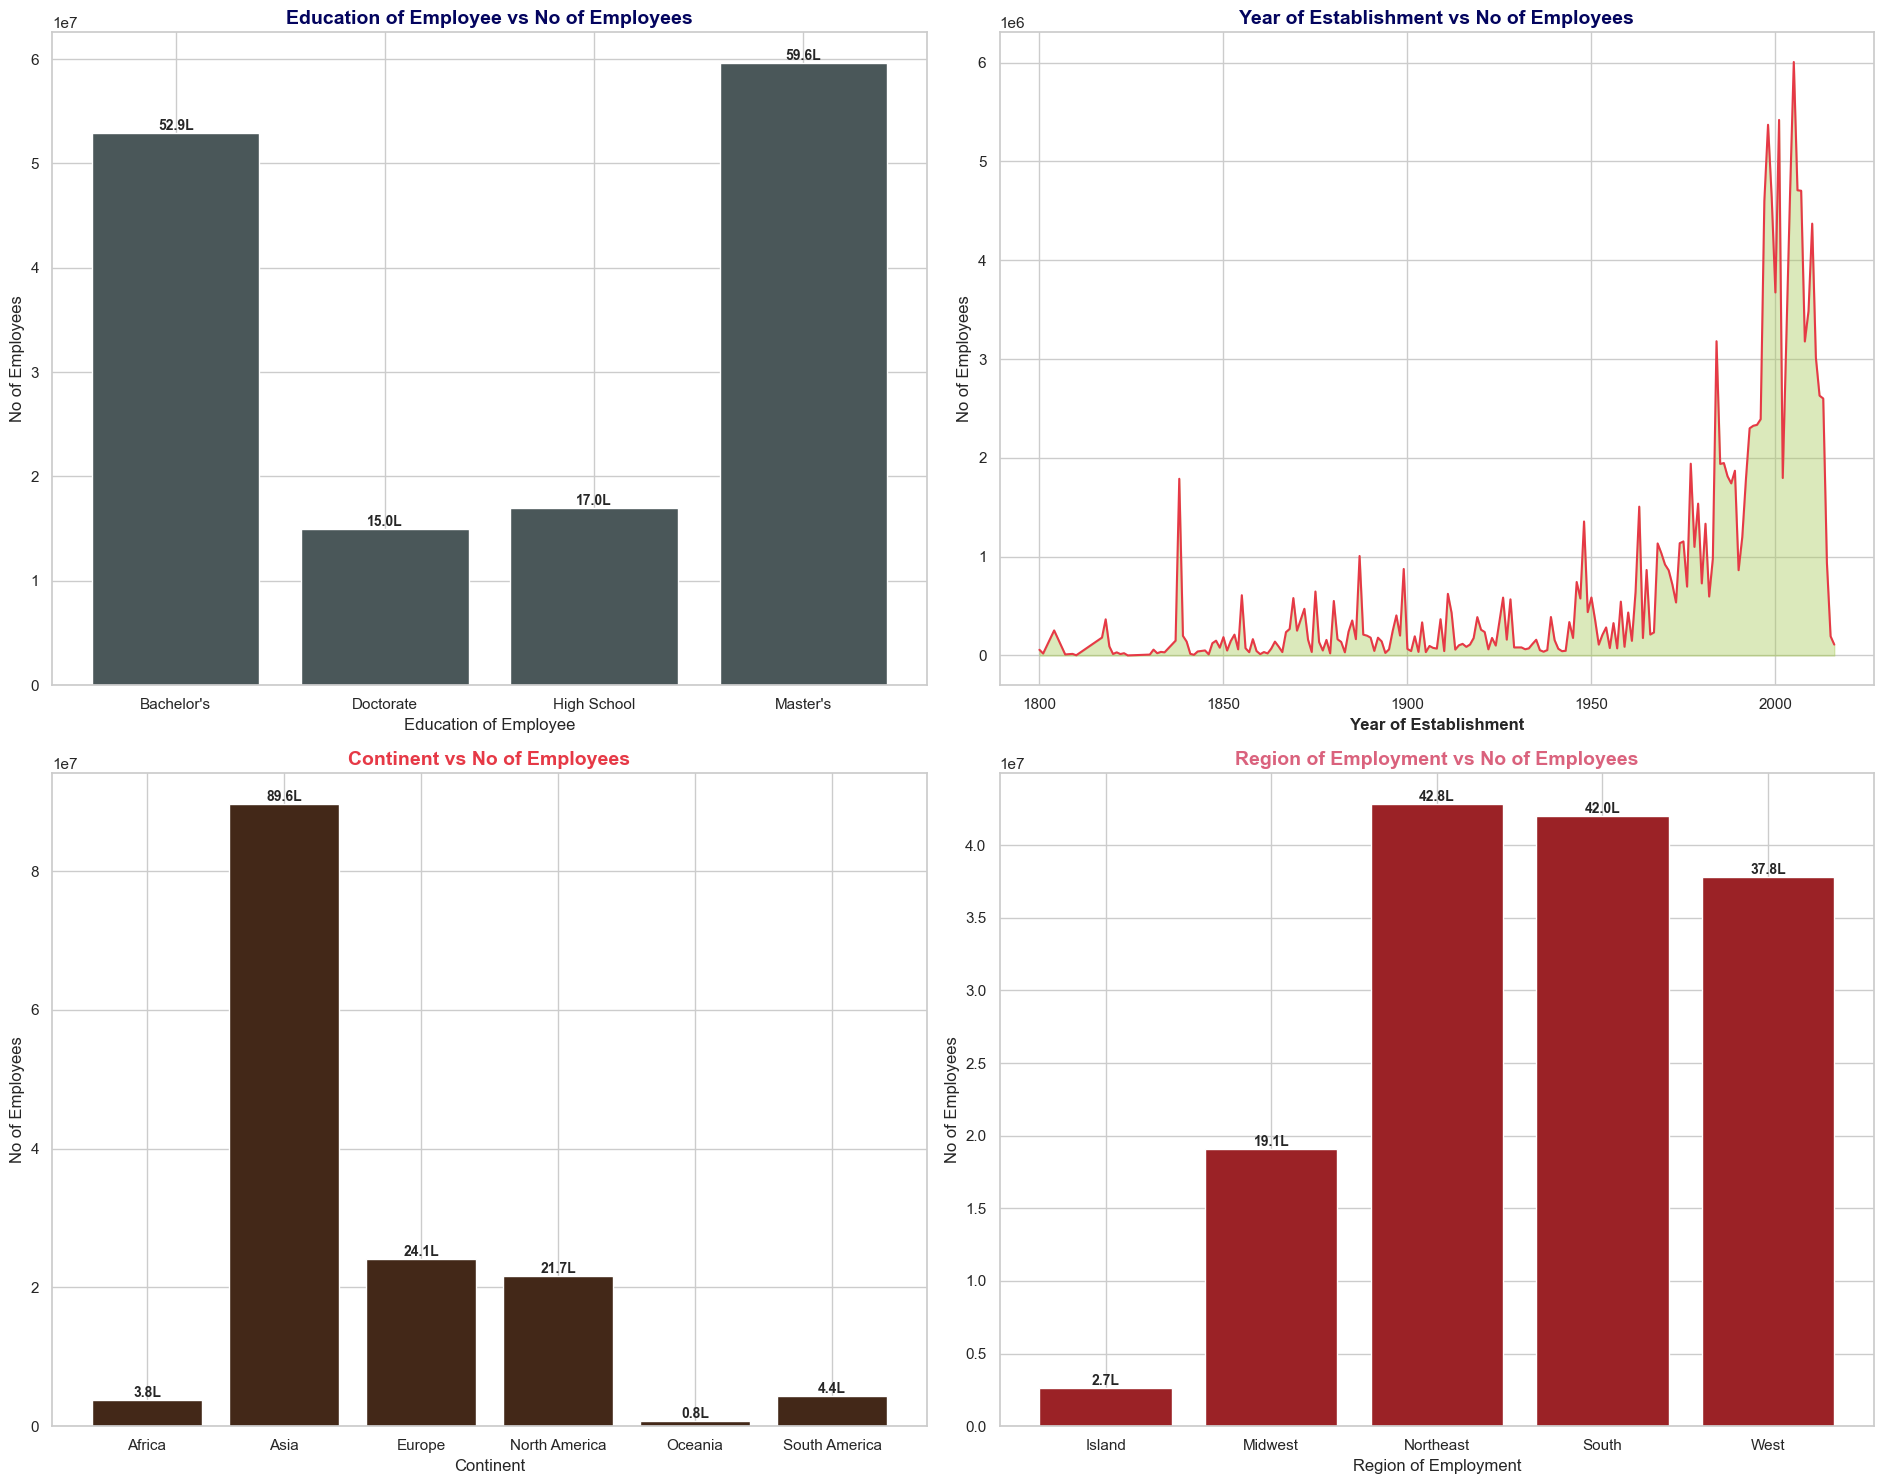

In [24]:
sns.set_style('whitegrid')
fig,axes=plt.subplots(2,2,figsize=(19,15))
sns.set_theme(style="darkgrid")

education_emoloyee=data.groupby('education_of_employee')['no_of_employees'].sum()
axes[0,0].bar(education_emoloyee.index,education_emoloyee.values,color='#4a5759')
for p in axes[0,0].patches:
    val = p.get_height()/1000000
    axes[0,0].annotate(
        f'{val:.1f}L',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

axes[0,0].set_title('Education of Employee vs No of Employees',fontsize=14,fontweight='bold',color='#03045e')
axes[0,0].set_xlabel('Education of Employee',fontsize=12)
axes[0,0].set_ylabel('No of Employees',fontsize=12)

year_and_employees=data.groupby('yr_of_estab')['no_of_employees'].sum()
axes[0,1].plot(year_and_employees.index,year_and_employees.values,color='#e63946')
axes[0,1].set_title('Year of Establishment vs No of Employees',fontsize=14,fontweight='bold',color='#03045e')
axes[0,1].set_xlabel('Year of Establishment',fontsize=12,fontweight='bold')
axes[0,1].set_ylabel('No of Employees',fontsize=12)
axes[0,1].fill_between(year_and_employees.index, year_and_employees.values, color="#a7c957", alpha=0.4)
axes[0,1].grid(True)

employess_with_contienet=data.groupby('continent')['no_of_employees'].sum()
axes[1,0].bar(employess_with_contienet.index,employess_with_contienet.values,color='#432818')
for p in axes[1,0].patches:
    val = p.get_height()/1000000
    axes[1,0].annotate(
        f'{val:.1f}L',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )
axes[1,0].set_title('Continent vs No of Employees',fontsize=14,fontweight='bold',color='#e63946')
axes[1,0].set_xlabel('Continent',fontsize=12)
axes[1,0].set_ylabel('No of Employees',fontsize=12)     

region_and_employees=data.groupby('region_of_employment')['no_of_employees'].sum()
axes[1,1].bar(region_and_employees.index,region_and_employees.values,color='#9b2226')
for p in axes[1,1].patches:
    val = p.get_height()/1000000
    axes[1,1].annotate(
        f'{val:.1f}L',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )
axes[1,1].set_title('Region of Employment vs No of Employees',fontsize=14,fontweight='bold',color='#da627d')
axes[1,1].set_xlabel('Region of Employment',fontsize=12)
axes[1,1].set_ylabel('No of Employees',fontsize=12)

plt.tight_layout()
plt.show()